In [4]:
import sys
!"{sys.executable}" -m pip install gensim --user


In [5]:
# CBOW (Continuous Bag of Words): Predicts the target word based on surrounding context.

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import gensim
from gensim.models import Word2Vec

In [6]:
# 'punkt': tokenizer for words and sentences.

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mangesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mangesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mangesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
sample_text = """
Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.
It focuses on developing algorithms that are able of decoding and analyzing data patterns.
Machine learning is used in a variety of applications such as email filtering, speech recognition, and computer vision.
The algorithms improve their performance as they are exposed to more data over time.
Learning from data enables machines to make predictions and decisions based on past experiences.
"""

In [8]:
sentences = re.sub('[^A-Za-z]+', ' ', sample_text)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()

In [9]:
# sent_tokenize() → splits text into individual sentences.
# word_tokenize() → splits each sentence into words.

all_sentences = sent_tokenize(sentences)
all_words = [word_tokenize(sent) for sent in all_sentences]
print(all_words)

[['machine', 'learning', 'is', 'field', 'of', 'computer', 'science', 'that', 'gives', 'computers', 'the', 'ability', 'to', 'learn', 'without', 'being', 'explicitly', 'programmed', 'it', 'focuses', 'on', 'developing', 'algorithms', 'that', 'are', 'able', 'of', 'decoding', 'and', 'analyzing', 'data', 'patterns', 'machine', 'learning', 'is', 'used', 'in', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'speech', 'recognition', 'and', 'computer', 'vision', 'the', 'algorithms', 'improve', 'their', 'performance', 'as', 'they', 'are', 'exposed', 'to', 'more', 'data', 'over', 'time', 'learning', 'from', 'data', 'enables', 'machines', 'to', 'make', 'predictions', 'and', 'decisions', 'based', 'on', 'past', 'experiences']]


In [10]:
# Removes stopwords, Keep only meaningful words and create a clean vocabulary list.

for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = sum(data, [])
print(data)
print(data1)

[['machine', 'learning', 'field', 'computer', 'science', 'gives', 'computers', 'ability', 'learn', 'without', 'explicitly', 'programmed', 'focuses', 'developing', 'algorithms', 'able', 'decoding', 'analyzing', 'data', 'patterns', 'machine', 'learning', 'used', 'variety', 'applications', 'email', 'filtering', 'speech', 'recognition', 'computer', 'vision', 'algorithms', 'improve', 'performance', 'exposed', 'data', 'time', 'learning', 'data', 'enables', 'machines', 'make', 'predictions', 'decisions', 'based', 'past', 'experiences']]
['machine', 'learning', 'field', 'computer', 'science', 'gives', 'computers', 'ability', 'learn', 'without', 'explicitly', 'programmed', 'focuses', 'developing', 'algorithms', 'able', 'decoding', 'analyzing', 'data', 'patterns', 'machine', 'learning', 'used', 'variety', 'applications', 'email', 'filtering', 'speech', 'recognition', 'computer', 'vision', 'algorithms', 'improve', 'performance', 'exposed', 'data', 'time', 'learning', 'data', 'enables', 'machines'

In [11]:
# Initializes a list to store (context, target) word pairs.
# window_size = 2 means each target word will have 2 words on each side as context.

context_target_pairs = []
window_size = 2

In [12]:
# For each word: Takes two words before and two after → context. The middle word is the target. Model learns to predict the target word using its context.

for i in range(window_size, len(data1) - window_size):
    context = [data1[i - 2], data1[i - 1], data1[i + 1], data1[i + 2]]
    target = data1[i]
    context_target_pairs.append((context, target))

In [14]:
# check if the window size and tokenization worked properly

print("First 5 context-target pairs:")
print(context_target_pairs[:1])

First 5 context-target pairs:
[(['machine', 'learning', 'computer', 'science'], 'field')]


In [15]:
# Word2Vec trains a model to learn vector (numeric) representations of words.
# vector_size=50: each word will be represented by a 50-dimensional vector.
# window=window_size: number of surrounding words to consider as context (2 in this case).
# min_count=1: include all words (even if they appear only once).
# sg=0: specifies CBOW model (if sg=1, it would be Skip-Gram model).

model = Word2Vec(sentences=data, vector_size=50, window=window_size, min_count=1, sg=0)


In [17]:
# model.wv.most_similar(word) returns words that appear in similar contexts.
# score indicates cosine similarity between word vectors

word = 'machine'
print(f"\nMost similar words to '{word}':")
similar_words = model.wv.most_similar(word)
for sim_word, score in similar_words:
    print(f"{sim_word}: {score:.4f}")


Most similar words to 'machine':
algorithms: 0.1657
computers: 0.1651
time: 0.1536
applications: 0.1381
based: 0.1366
improve: 0.1274
learning: 0.1249
decoding: 0.1214
decisions: 0.1069
experiences: 0.1024


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# PCA reduces high-dimensional word vectors (50 dimensions) to 2D for easy visualization.

from sklearn.decomposition import PCA

In [20]:
# model.wv.index_to_key: Returns all the words in the vocabulary.
# model.wv[...]: Extracts their corresponding word vectors.
# PCA(n_components=2): Reduces vector size from 50D → 2D.

X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

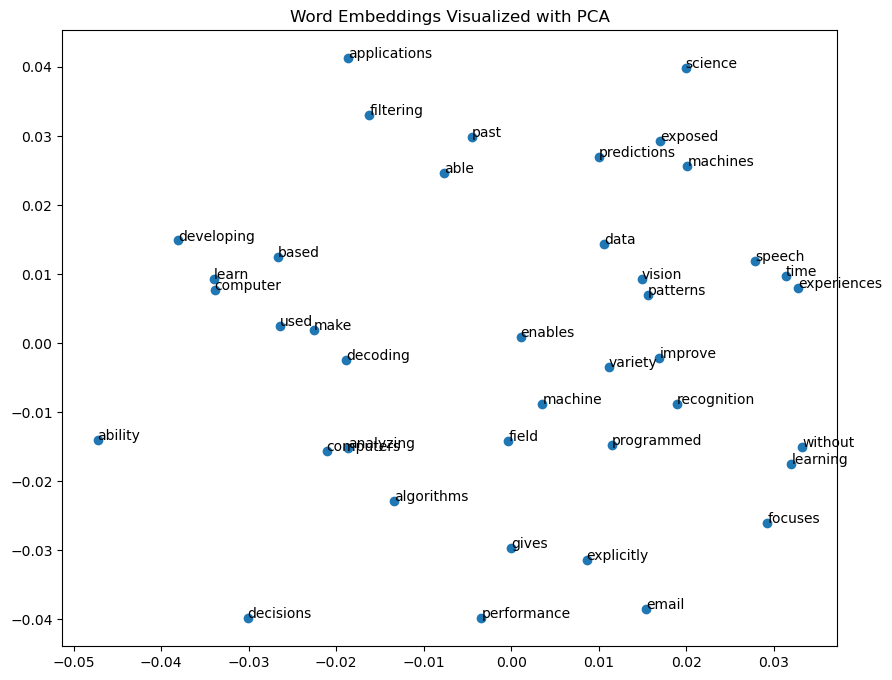

In [21]:
# Plots all the words in 2D space using PCA results. Each point represents one word vector
 
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
words = model.wv.index_to_key

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings Visualized with PCA")
plt.show()

In [22]:
# Show the word vector representation of any word from your model?. 
# Each word in the vocabulary is represented by a 50-dimensional vector. This vector captures the semantic meaning of the word

word = 'machine'
print(f"Vector representation of '{word}':\n")
print(model.wv[word])
print("\nVector size:", len(model.wv[word]))



Vector representation of 'machine':

[ 0.0001948   0.00615531 -0.01361566 -0.00275787  0.01534512  0.01468436
 -0.00735248  0.00529243 -0.01662498  0.0124199  -0.0092899  -0.00633838
  0.01862069  0.00175074  0.01498272 -0.01214353  0.01033769  0.01984857
 -0.01691525 -0.01027514 -0.01412678 -0.00972225 -0.00755005 -0.01707387
  0.01592357 -0.00968216  0.01684404  0.01052833 -0.01310378  0.00792122
  0.0109294  -0.01484011 -0.01480536 -0.00494219 -0.01725523 -0.00317001
 -0.00080777  0.00659535  0.00288434 -0.0017593  -0.0111872   0.00346812
 -0.00178278  0.01358433  0.00794419  0.00905262  0.00288134 -0.00539548
 -0.00873423 -0.00204899]

Vector size: 50


In [25]:
# calculate similarity between two words manually. Word similarity is based on cosine similarity between word vectors

similarity = model.wv.similarity('machine', 'learning')
print(f"Similarity between 'machine' and 'learning': {similarity:.4f}")


Similarity between 'machine' and 'learning': 0.1249


In [26]:
# find the most dissimilar or unrelated word among a group.

odd_word = model.wv.doesnt_match(['machine', 'learning', 'data', 'apple'])
print("Odd word out:", odd_word)


Odd word out: data


In [27]:
# show me the vocabulary that your model has learned. 

print("Vocabulary words learned by the model:\n")
print(list(model.wv.index_to_key))


Vocabulary words learned by the model:

['data', 'learning', 'algorithms', 'computer', 'machine', 'experiences', 'past', 'based', 'decisions', 'predictions', 'make', 'machines', 'enables', 'time', 'exposed', 'performance', 'improve', 'vision', 'recognition', 'speech', 'filtering', 'email', 'applications', 'variety', 'used', 'patterns', 'analyzing', 'decoding', 'able', 'developing', 'focuses', 'programmed', 'explicitly', 'without', 'learn', 'ability', 'computers', 'gives', 'science', 'field']
